In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [20]:
df = pd.read_csv('Ahmedabad_final.csv')
df = df.drop(columns=['Unnamed: 0'])
df = df.apply(pd.to_numeric,errors='coerce')

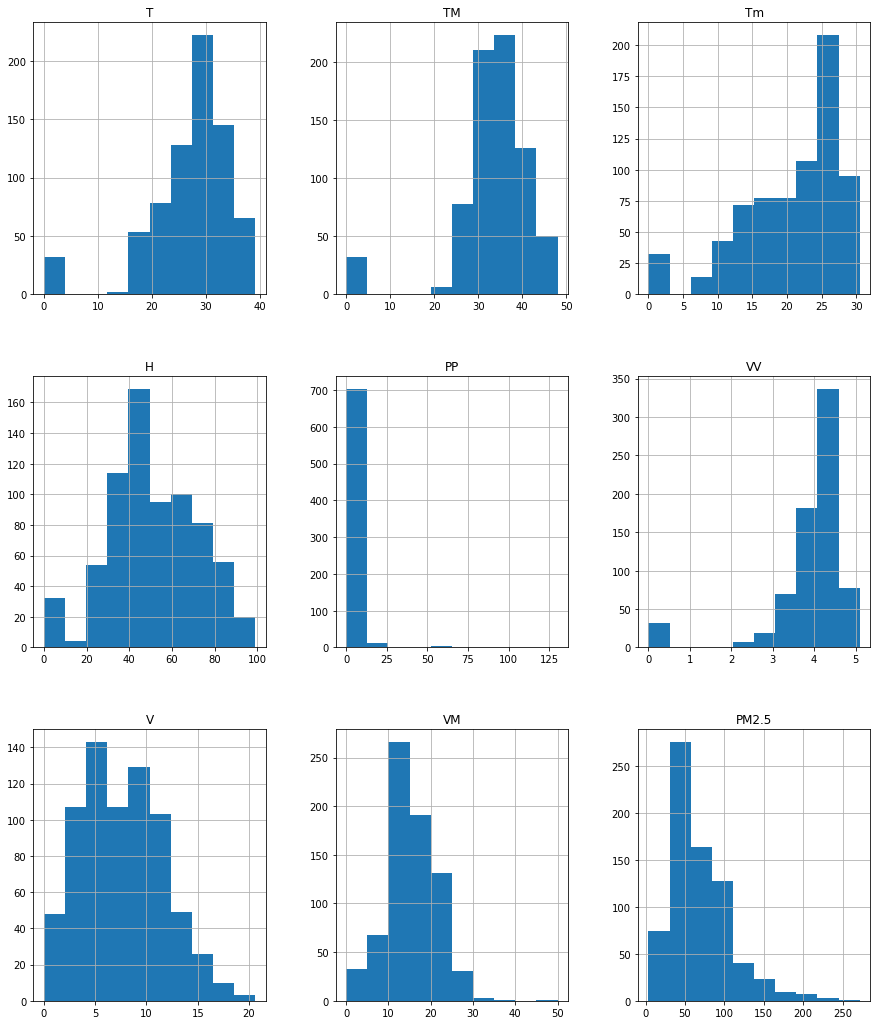

In [21]:
plt.rcParams["figure.figsize"] = 15,18
df.hist();

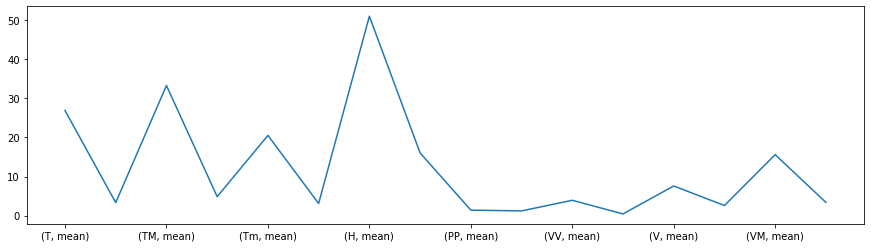

In [22]:
df.groupby('PM2.5').agg(['mean', 'std']).mean().plot(kind='line',figsize=(15,4));

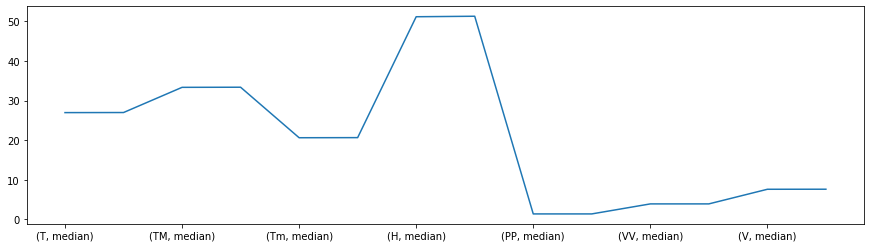

In [23]:
df.groupby(by=['PM2.5','VM']).agg(['median','max']).mean().plot(kind='line',figsize=(15,4));

{'whiskers': [<matplotlib.lines.Line2D at 0x20f55b4be80>,
 'caps': [<matplotlib.lines.Line2D at 0x20f548fe070>,
 'boxes': [<matplotlib.lines.Line2D at 0x20f55b4b370>],
 'medians': [<matplotlib.lines.Line2D at 0x20f548fe700>],
 'fliers': [<matplotlib.lines.Line2D at 0x20f548fecd0>],
 'means': []}

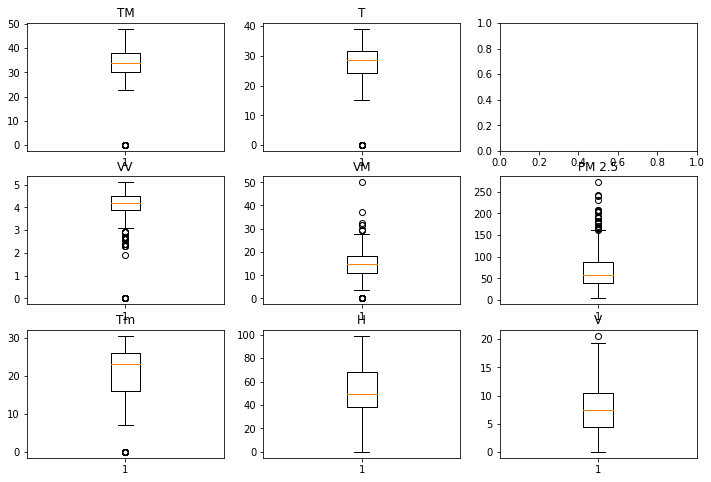

In [24]:
df['PM2.5'] = df['PM2.5'].astype("float")
from pylab import rcParams
rcParams["figure.figsize"] = 12,8
import matplotlib.pyplot as plt
fig,axes = plt.subplots(3,3)

axes[0,0].set_title("TM")
axes[0,0].boxplot(df['TM'])
axes[0,1].set_title("T")
axes[0,1].boxplot(df['T'])

axes[1,0].set_title("VV")
axes[1,0].boxplot(df['VV'])
axes[1,1].set_title("VM")
axes[1,1].boxplot(df['VM'])
axes[1,2].set_title("PM 2.5")
axes[1,2].boxplot(df['PM2.5'])

axes[2,0].set_title("Tm")
axes[2,0].boxplot(df['Tm'])
axes[2,1].set_title("H")
axes[2,1].boxplot(df['H'])
axes[2,2].set_title("V")
axes[2,2].boxplot(df['V'])

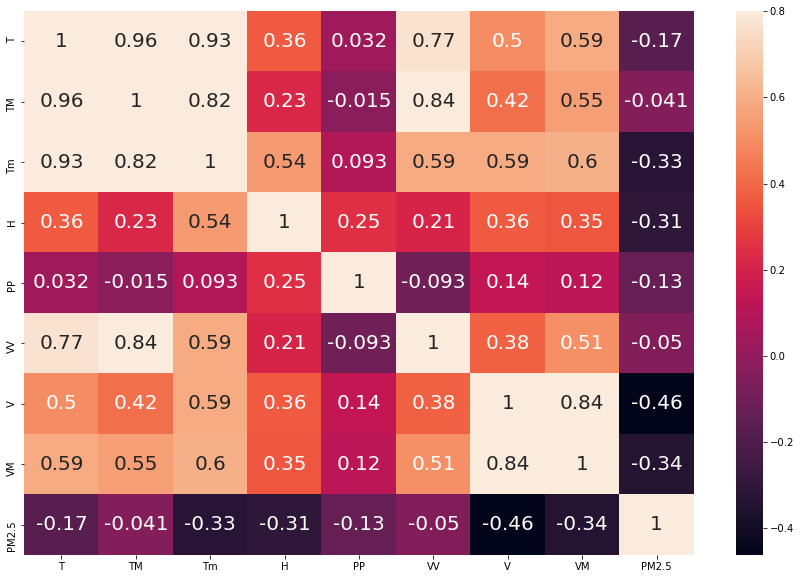

In [25]:
fig_dims = (15, 10)
fig, ax = plt.subplots(figsize=fig_dims)
sns.heatmap(df.corr(), vmax=.8,annot_kws={'size': 20}, annot=True,ax=ax);

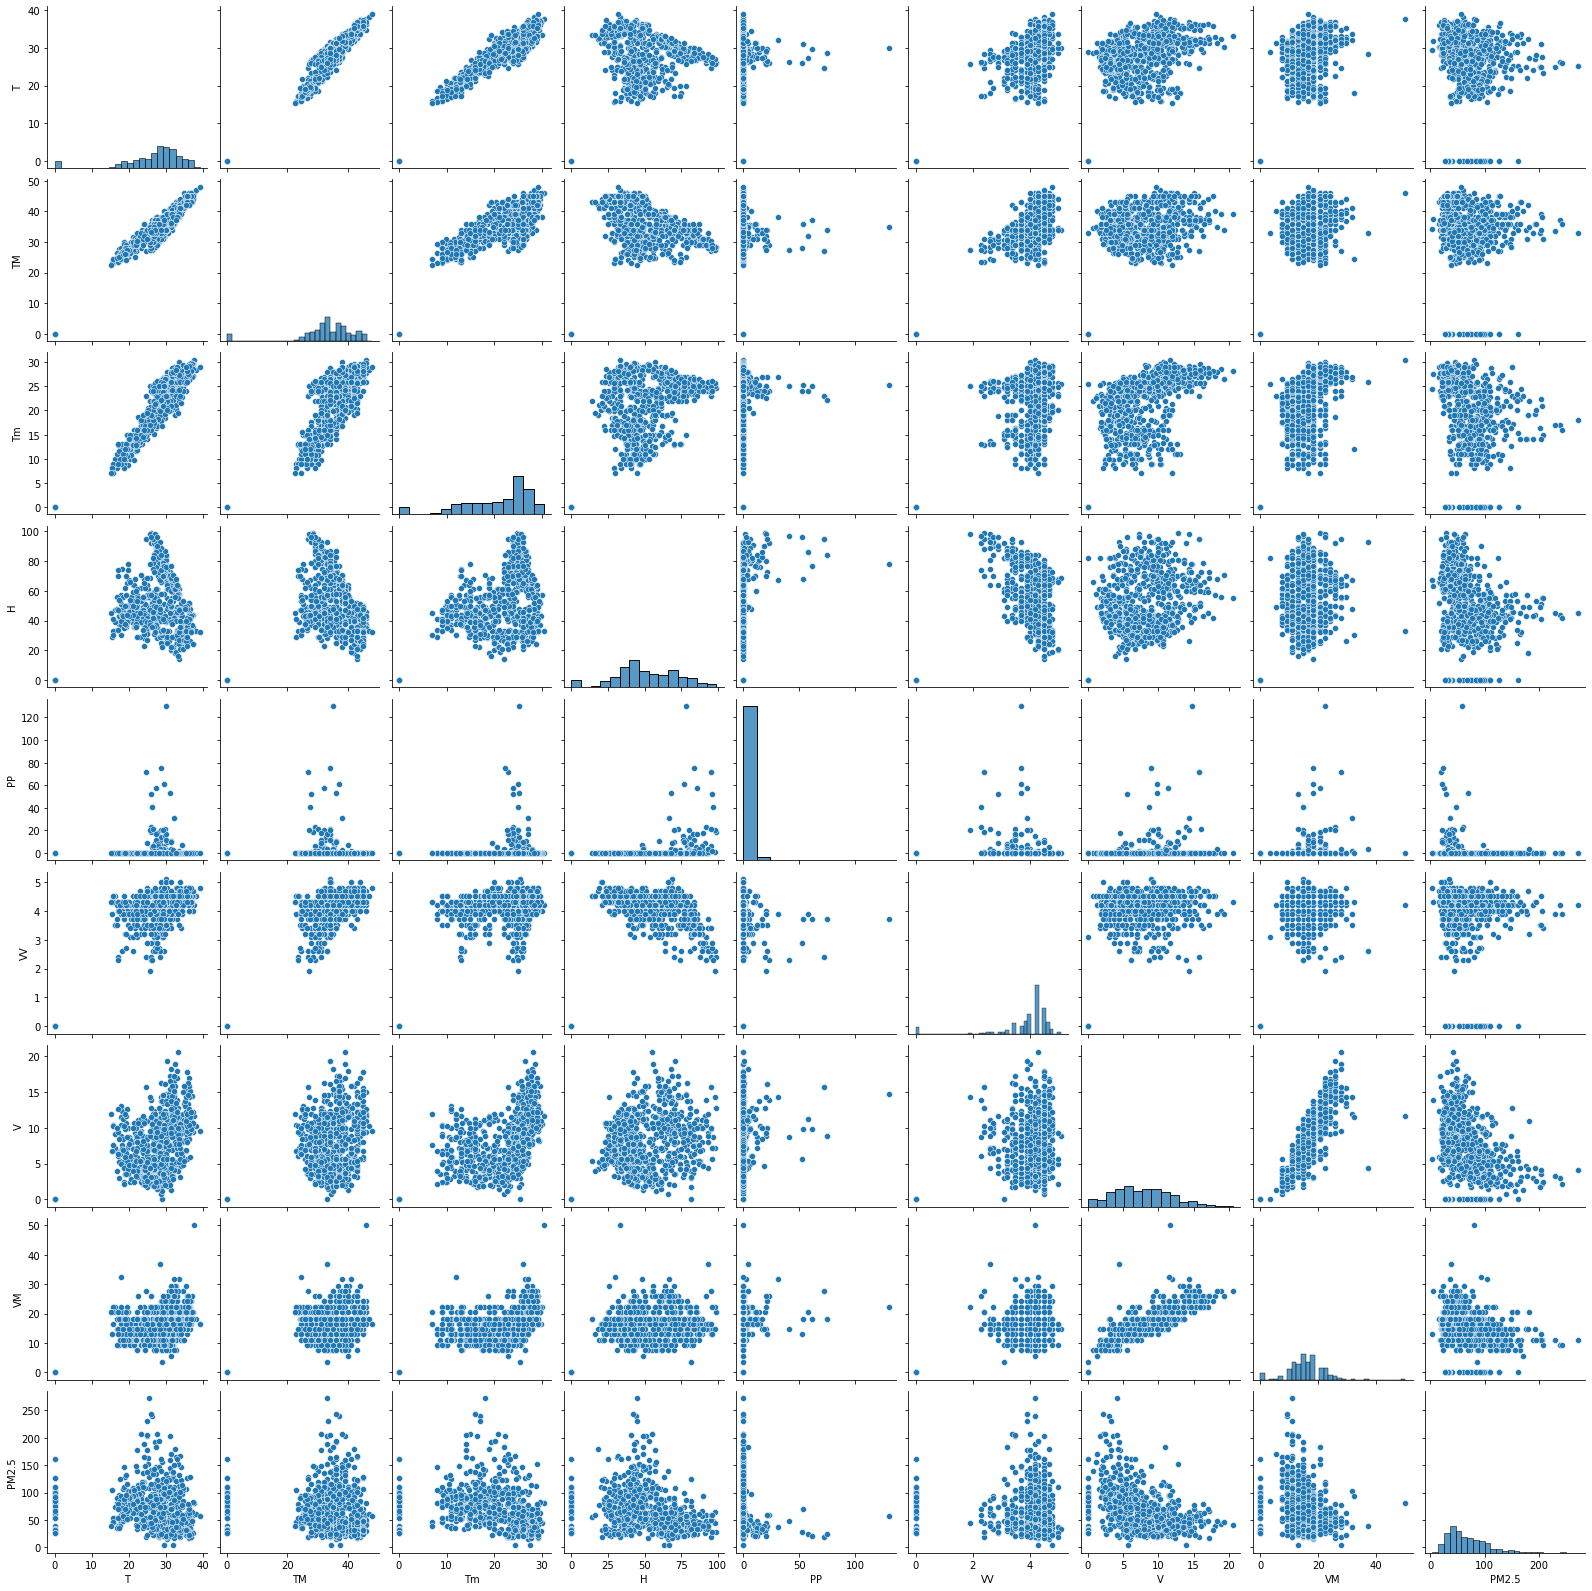

In [26]:
sns.pairplot(df);

In [27]:
x = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [28]:
from sklearn.tree import DecisionTreeRegressor

In [29]:
dtree=DecisionTreeRegressor(criterion="mse")

In [30]:
dtree.fit(x,y)

DecisionTreeRegressor()

In [31]:
dtreepred = dtree.predict(x)

C:\Users\okabe\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


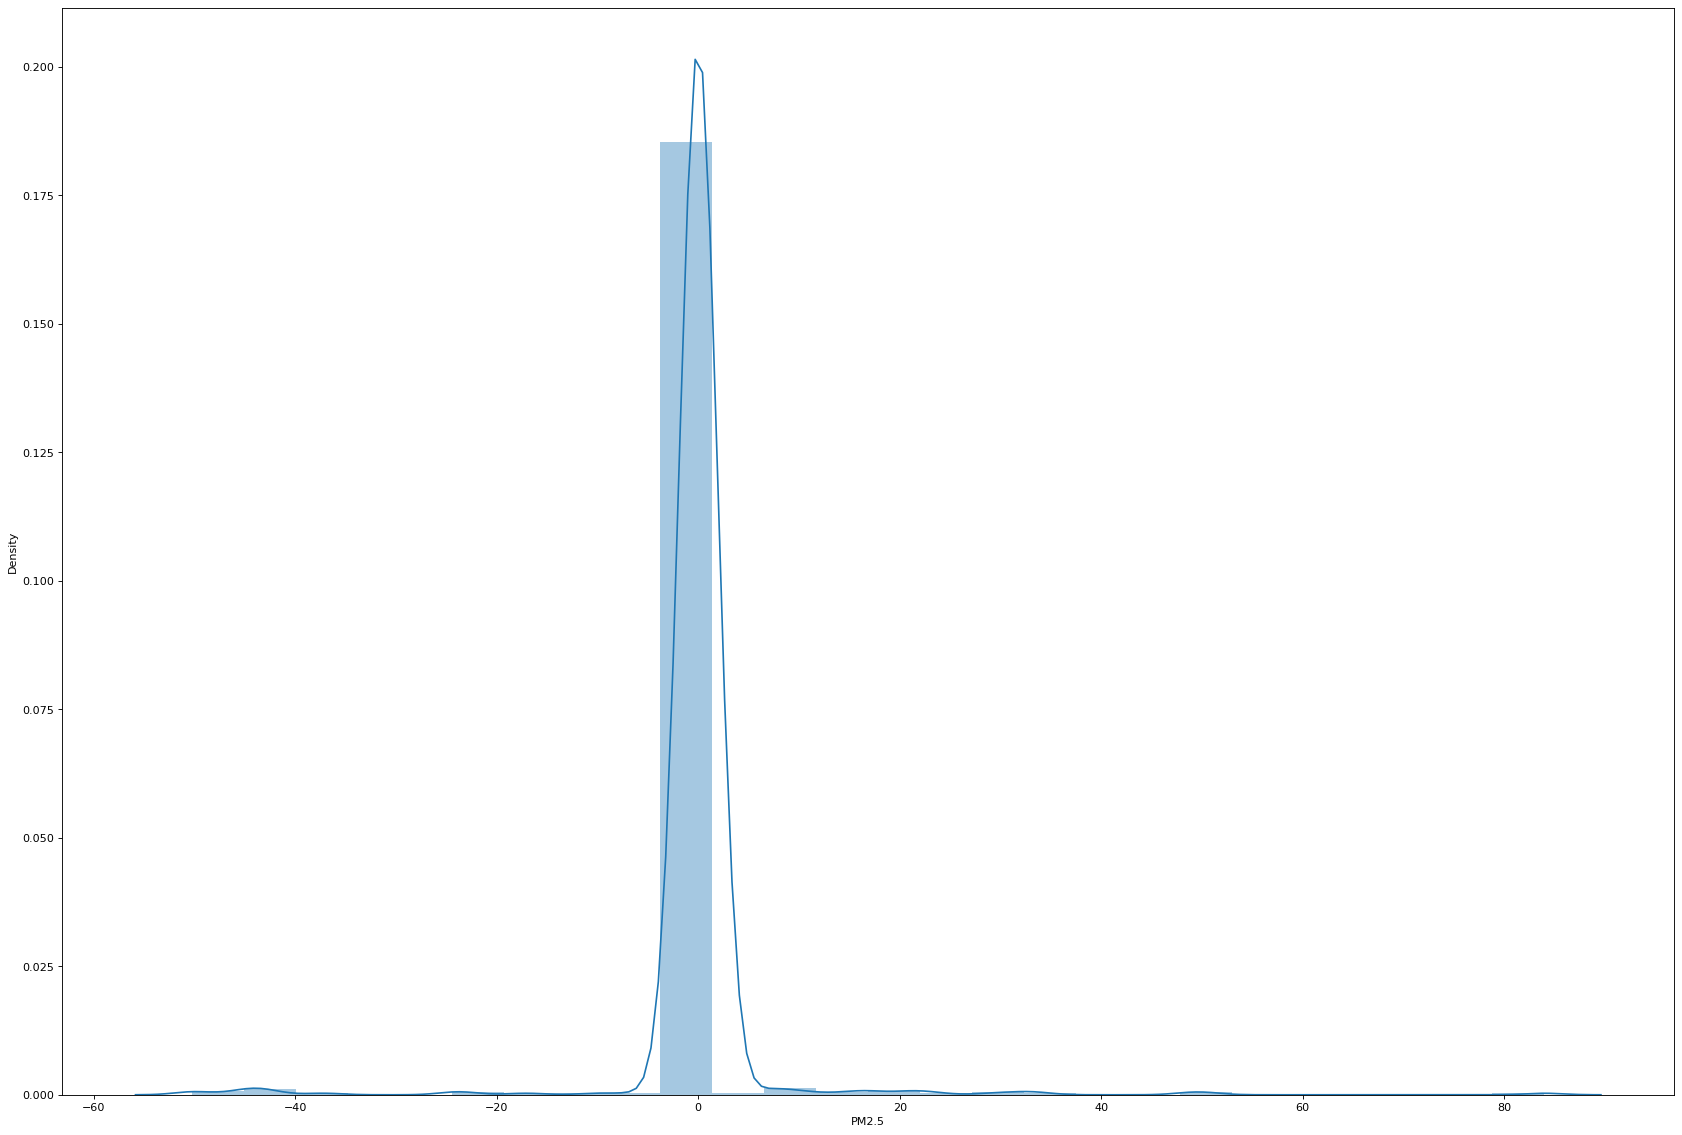

In [32]:
from matplotlib.pyplot import figure
figure(figsize=(26,18), dpi=80);
sns.distplot(y-dtreepred);